# Test nexpy + pandas + lmfit
https://lmfit.github.io/lmfit-py/model.html

In [2]:
import sys
sys.path.append('/dls_sw/i16/software/python')
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
from dlstools.pdnx import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
%matplotlib notebook
p='/dls/i16/data/2019/cm22970-3/%i.nxs'
datadir='/dls/i16/data/2019/mm22314-1/'

## Load nexus file to Pandas DataFrame
Here n is the DataFrame and n.nx is the full NeXus file

In [3]:
n=pdnx(p % 784075)
n

/dls_sw/i16/software/python/dlstools/pdnx.py:73: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self,'nx',_nx)


,TimeFromEpoch,TimeSec,beamOK,count_time,delta_axis_offset,eta,ic1monitor,kap,kdelta,kgam,kmu,kphi,kth,maxval,maxx,maxy,path,rc,sum
0,1.563190e+09,505982.856964,1.0,1.0,8.8,34.250,731.023320,-127.707263,60.160922,0.0,0.0,97.630918,86.880918,5554.0,233.0,90.0,1.0,301.283173,18156.0
1,1.563190e+09,505984.921328,1.0,1.0,8.8,34.251,731.090480,-127.707263,60.160922,0.0,0.0,97.630918,86.881918,5641.0,233.0,90.0,2.0,301.271576,19100.0
2,1.563190e+09,505986.781368,1.0,1.0,8.8,34.252,731.050792,-127.707263,60.160922,0.0,0.0,97.630918,86.882918,5551.0,233.0,90.0,3.0,301.259186,22321.0
3,1.563190e+09,505988.847194,1.0,1.0,8.8,34.253,731.026371,-127.707263,60.160922,0.0,0.0,97.630918,86.883918,5065.0,234.0,90.0,4.0,301.245667,23458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.563190e+09,506170.843024,1.0,1.0,8.8,34.347,727.234697,-127.707263,60.160922,0.0,0.0,97.630918,86.977918,48.0,244.0,100.0,98.0,300.146454,2297.0
98,1.563190e+09,506172.898364,1.0,1.0,8.8,34.348,727.243856,-127.707263,60.160922,0.0,0.0,97.630918,86.978918,45.0,245.0,100.0,99.0,300.134521,2182.0
99,1.563190e+09,506174.734600,1.0,1.0,8.8,34.349,727.277441,-127.707263,60.160922,0.0,0.0,97.630918,86.979918,47.0,245.0,100.0,100.0,300.122681,2169.0
100,1.563190e+09,506176.792111,1.0,1.0,8.8,34.350,727.338499,-127.707263,60.160922,0.0,0.0,97.630918,86.980918,45.0,245.0,100.0,101.0,300.107574,2079.0


## Perform DataFrame plot

<IPython.core.display.Javascript object>


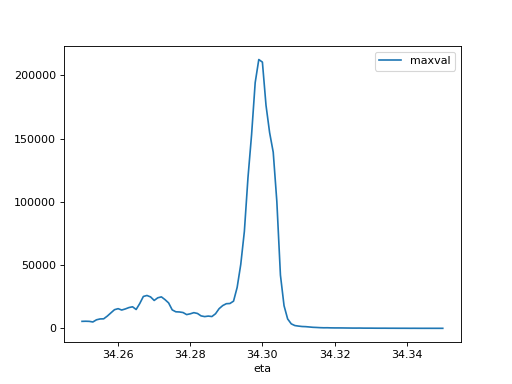

In [4]:
n.plot('eta','maxval')

## Create and plot a new DataFrame series

<IPython.core.display.Javascript object>


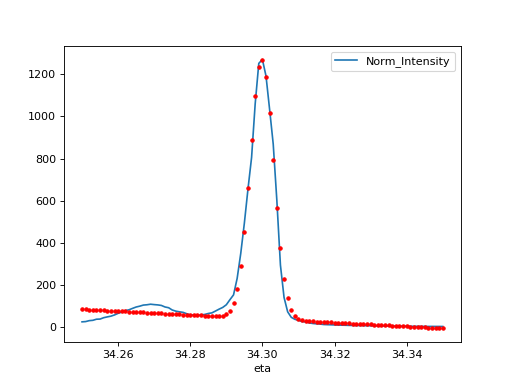

In [5]:
n['Norm_Intensity']=n['sum']/n['ic1monitor']
n
n.plot('eta','Norm_Intensity')

## Fit peak to a Gaussian with linear background 
## (need to click on plot first and in-line plotting has to be working)

In [6]:
#click on plot to do fit
fit(g_lin)

(Model(gauss) + Model(poly2))

      area:             9.98 +/- 0.14      
       cen:         34.29980 +/- 0.00005   
      fwhm:          0.00761 +/- 0.00011   
         m:             -909 +/- 104       
         c:            31227 +/- 3556      




## Perform default NeXus plot (based on NeXus default axes determined by GDA)

<IPython.core.display.Javascript object>


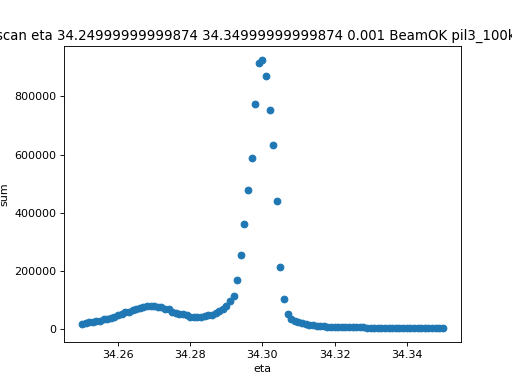

In [7]:
figure()
n.nx.plot()